In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

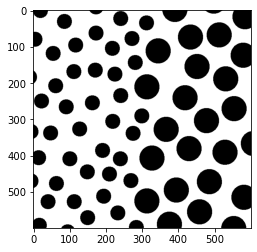

In [2]:
image = cv2.imread("Fig0943.tif", cv2.COLOR_BGR2GRAY)
for i in range(len(image)):
    for j in range(len(image)):
        if image[i][j] <= 76:
            image[i][j] = 0
        else:
            image[i][j] = 255
plt.imshow(image, cmap="gray")

In [3]:
x = np.linspace(-30, 30, 61)
y = np.linspace(-30, 30, 61)
x, y = np.meshgrid(x, y)
mask = np.sqrt((x)**2+(y)**2)
radius = 30
for x in range(0,61):
    for y in range(0,61):
        if mask[x,y] < radius:
            mask[x,y] = 1
        elif mask[x,y] >= radius:
            mask[x,y] = 0
mask = mask.astype(np.uint8)

In [4]:
def dilate(image, mask):
    edge = (mask.shape[0]-1)//2
    size = image.shape
    new_image = np.zeros((size[0], size[1]))
    
    for x in range(edge, size[0]-edge):
        for y in range(edge, size[1]-edge):
            if np.sum(image[x-edge:x+edge+1, y-edge:y+edge+1]*mask) != 0:
                new_image[x,y] = 255

    new_image = new_image[edge:size[0]-edge, edge:size[1]-edge]            
    
    return new_image

def erode(image, mask):
    edge = (mask.shape[0]-1)//2
    size = image.shape
    new_image = np.zeros((size[0], size[1]))
    mask_sum = np.sum(mask)*255

    for x in range(edge, size[0]-edge):
        for y in range(edge, size[1]-edge):
            if (np.sum(image[x-edge:x+edge+1, y-edge:y+edge+1]*mask) == mask_sum):
                new_image[x,y] = 255

    new_image = new_image[edge:size[0]-edge, edge:size[1]-edge]            
                
    return new_image

In [5]:
# fechamento
dilate = dilate(image, mask)
erode = erode(dilate, mask)

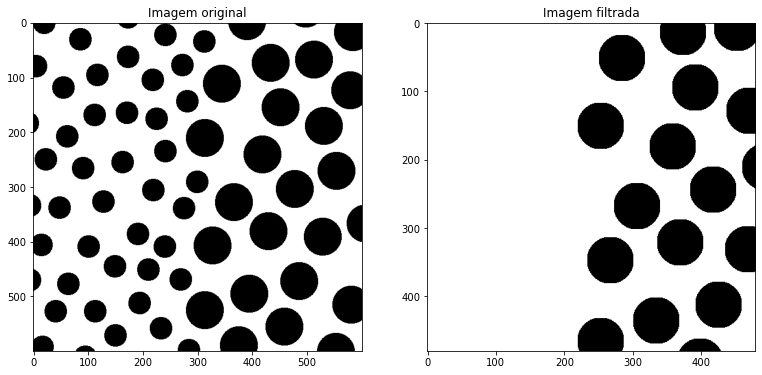

In [6]:
plt.figure(figsize=(20,20))
plt.subplot(131)
plt.title("Imagem original")
plt.imshow(image, "gray")
plt.subplot(132)
plt.title("Imagem filtrada")
plt.imshow(erode, "gray")